In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.cluster import KMeans


In [6]:
df = pd.read_csv ('ifood_df.csv')

In [7]:
df.head ()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [8]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [9]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [10]:
# Replace '1' with '5' and '0' with blank ('') in 'marital_Married' column
df['marital_Married'] = df['marital_Married'].astype(str).replace({'1': '5', '0': ''})

# Replace '1' with '4' and '0' with blank ('') in 'marital_Single' column
df['marital_Single'] = df['marital_Single'].astype(str).replace({'1': '4', '0': ''})

# Replace '1' with '3' and '0' with blank ('') in 'marital_Together' column
df['marital_Together'] = df['marital_Together'].astype(str).replace({'1': '3', '0': ''})

# Replace '1' with '2' and '0' with blank ('') in 'marital_Widow' column
df['marital_Widow'] = df['marital_Widow'].astype(str).replace({'1': '2', '0': ''})

# Replace '0' with blank ('') in 'marital_Divorced' column
df['marital_Divorced'] = df['marital_Divorced'].astype(str).replace({'0': ''})

# Now all columns contain different numbers for different marital status, let's concatenate them into one column.
df['marital_status'] = df['marital_Widow'] + df['marital_Together'] + df['marital_Single'] + df['marital_Married'] + df['marital_Divorced']

# Map numbers into different categorical values.
df['marital_status'] = df['marital_status'].map({'1': 'Divorced', '2': 'Widow', '3': 'Together', '4': 'Single', '5': 'Married'})


In [11]:
# Replace numbers with corresponding education levels
df['education_2n Cycle'] = df['education_2n Cycle'].astype(str).replace({'0': ''})
df['education_Basic'] = df['education_Basic'].astype(str).replace({'1': '2', '0': ''})
df['education_Graduation'] = df['education_Graduation'].astype(str).replace({'1': '3', '0': ''})
df['education_Master'] = df['education_Master'].astype(str).replace({'1': '4', '0': ''})
df['education_PhD'] = df['education_PhD'].astype(str).replace({'1': '5', '0': ''})

# Concatenate columns into a single column
df['education_level'] = df['education_2n Cycle'] + df['education_Basic'] + df['education_Graduation'] + df['education_Master'] + df['education_PhD']

# Map codes to education levels
df['education_level'] = df['education_level'].map({'2': '2n Cycle', '3': 'Basic', '4': 'Graduation', '5': 'Master', '': 'PhD'})

# Summing up the number of kids
df['kids'] = df['Kidhome'] + df['Teenhome']

In [12]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_status', 'education_level', 'kids'],
      dtype='object')

In [13]:
df.describe ()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,0.948753
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.094827,0.0,0.0,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,0.749231
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,3.000000


In [14]:
df.nunique () 

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [15]:
df.drop (columns= ['Z_CostContact', 'Z_Revenue'], inplace=True)

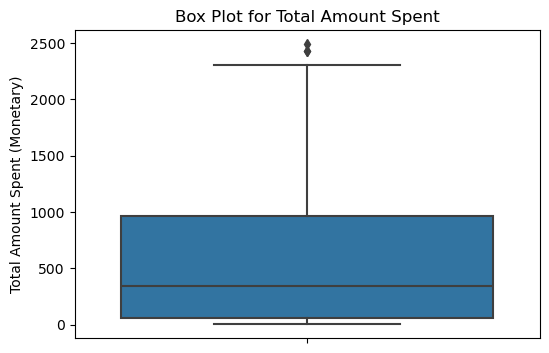

In [16]:
plt.figure (figsize=(6, 4))
sns.boxplot (data=df, y='MntTotal')
plt.title ('Box Plot for Total Amount Spent')
plt.ylabel ('Total Amount Spent (Monetary)')
plt.show ()

In [17]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df [~df['MntTotal'].between (lower_bound, upper_bound)]
outliers.head ()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,,,4,,2429,2333,1,Single,Graduation,0
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,,3,,,2491,2458,3,Together,Basic,0
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,,,4,,2429,2333,1,Single,Graduation,0


In [18]:
df = df [(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
df.describe ()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.064033,0.013624,0.009083,0.150318,51.124432,2512.923706,560.193915,516.178928,0.297457,0.950045
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.244867,0.115950,0.094891,0.357464,11.687703,202.594957,572.096830,549.962471,0.678134,0.748922
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.000000,2159.000000,4.000000,-283.000000,0.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,43.000000,2339.250000,56.000000,42.000000,0.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,2515.000000,342.500000,288.000000,0.000000,1.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,2688.000000,962.000000,883.000000,0.000000,1.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,80.000000,2858.000000,2304.000000,2259.000000,4.000000,3.000000


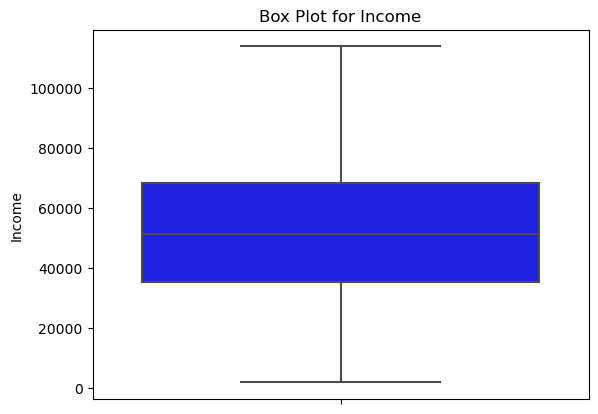

In [19]:
sns.boxplot (data=df, y='Income', color='blue')
plt.title ('Box Plot for Income')
plt.ylabel ('Income')
plt.show ()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


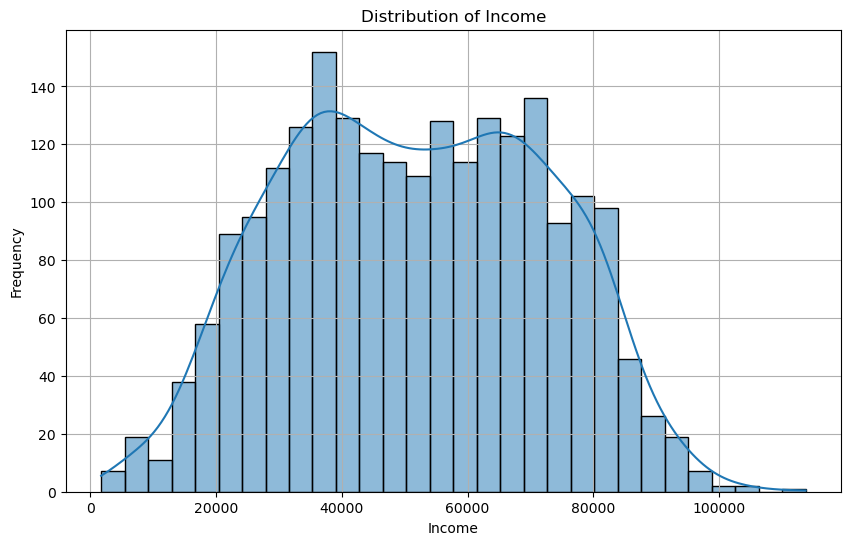

In [20]:
plt.figure (figsize=(10, 6))
sns.histplot (data=df, x='Income', bins=30, kde=True) 
plt.title ('Distribution of Income')  
plt.xlabel ('Income')  
plt.ylabel ('Frequency')
plt.grid (True) 
plt.show ()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


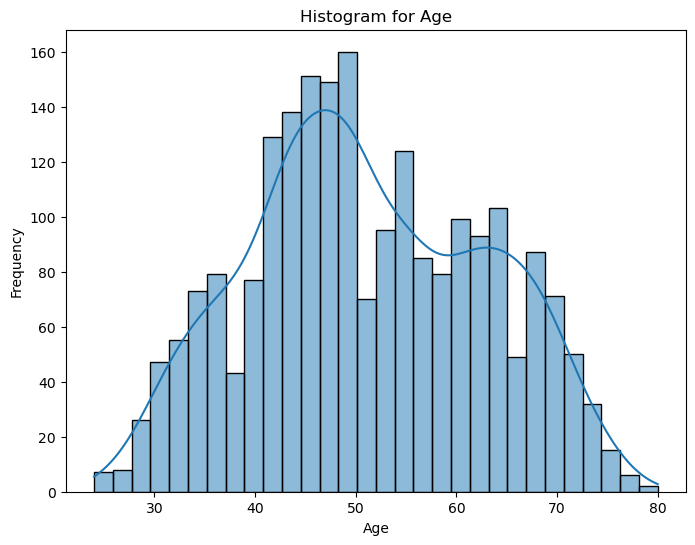

In [21]:
plt.figure (figsize=(8, 6))  
sns.histplot (data=df, x='Age', bins=30, kde=True)
plt.title ('Histogram for Age')
plt.xlabel ('Age')
plt.ylabel ('Frequency')
plt.show ()

In [22]:
print ("Skewness: %f" % df['Age'].skew())
print ("Kurtosis: %f" % df['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


In [1]:
sns.countplot (data=df, x='education_level')
plt.title('Count of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

NameError: name 'sns' is not defined

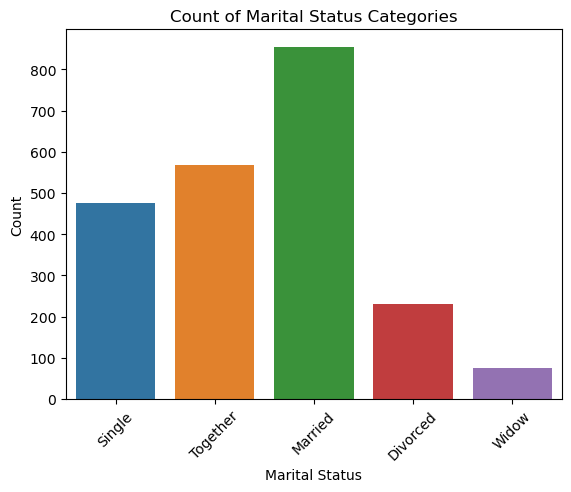

In [24]:

sns.countplot(data=df, x='marital_status')
plt.title('Count of Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

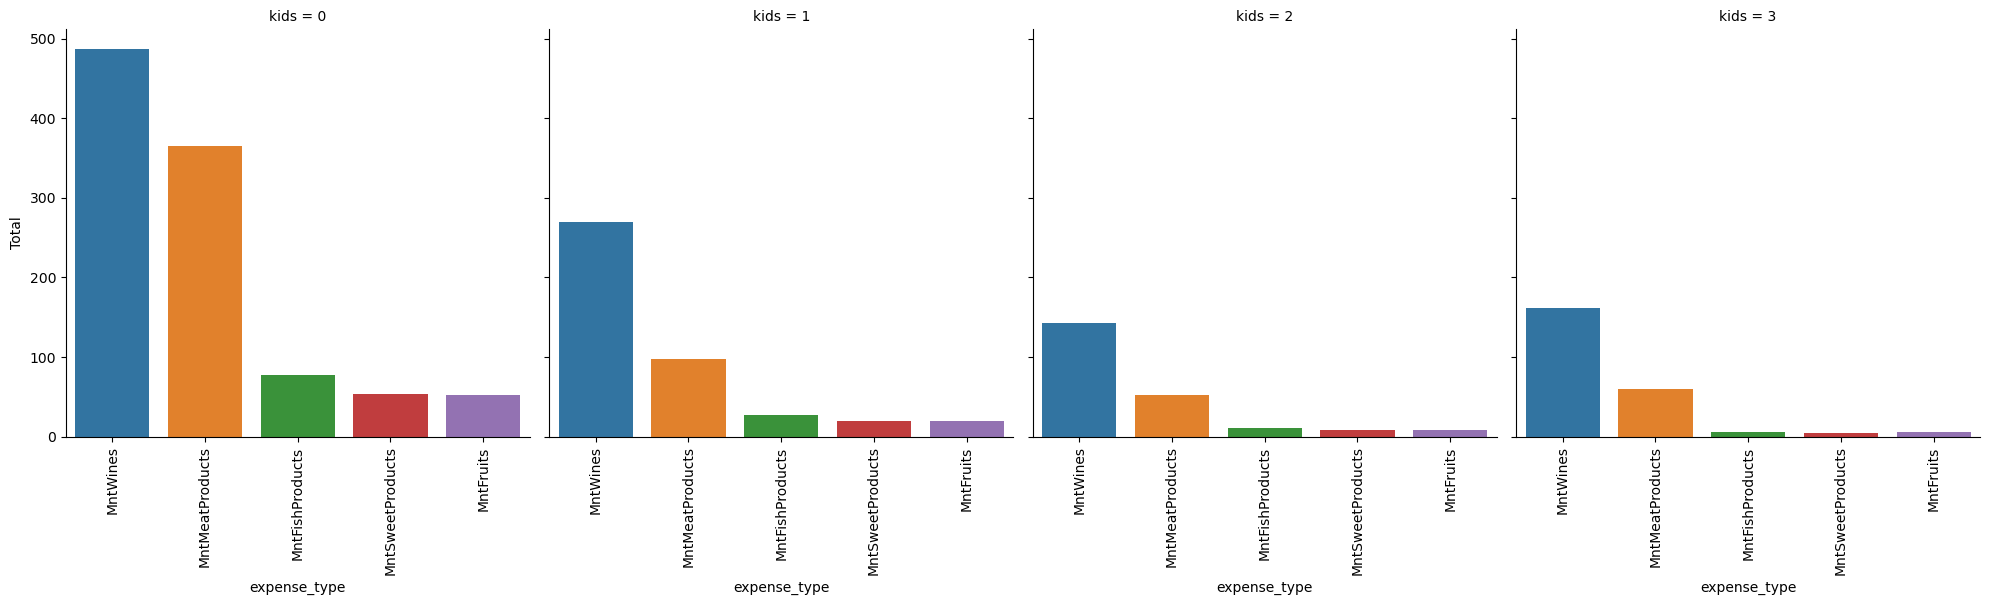

<Figure size 1500x1000 with 0 Axes>

In [36]:
# Calculate mean expenses for different product categories based on the number of kids
expenses = df.groupby(["kids"])[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]].mean().unstack().reset_index(name="Total").rename(columns={'level_0': 'expense_type'})

# Create categorical plot (bar plot)
g = sns.catplot(data=expenses.sort_values(by="Total", ascending=False),
                x="expense_type",
                y="Total",
                kind="bar",
                legend=True,
                col="kids")

# Rotate x-axis labels
g.set_xticklabels(rotation=90)

# Set figure size
plt.figure(figsize=(15, 10))

# Show plot
plt.show()

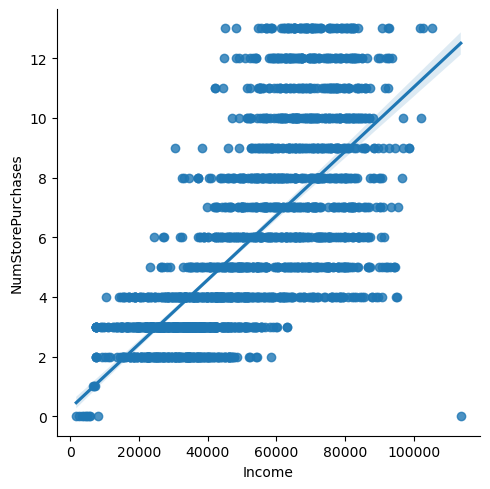

In [37]:
sns.lmplot (data= df, x= "Income", y= "NumStorePurchases")
plt.show()

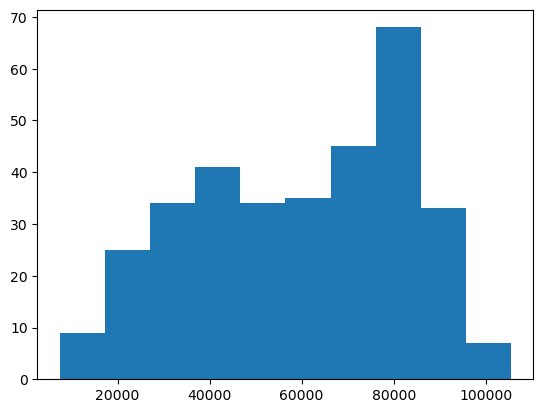

In [38]:
plt.hist (df [df ["Response"]==1] ["Income"])
plt.show()

In [39]:
cols_demographics = ['Income', 'Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

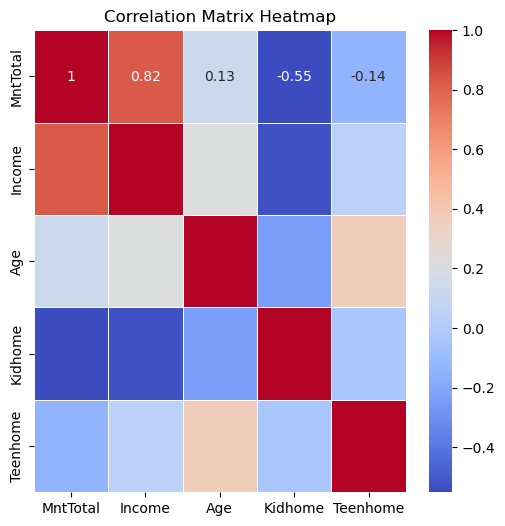

In [47]:
corr_matrix = df[['MntTotal'] + cols_demographics + cols_children].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
def marital_status(row):
    if row['marital_status'] == 'Together' or row['marital_status'] == 'Married':
        return 1
    else:
        return 0

df['In_relationship'] = df.apply(marital_status, axis=1)
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,3,,,1529,1441,0,Single,Basic,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,,,21,15,0,Single,Basic,2,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,3,,,734,692,0,Together,Basic,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,,,48,43,0,Together,Basic,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,,,5,407,392,0,Married,Master,1,1
